# COMP 4030/6030 Assignment 7
### Due 11/12/2020

### Name:  Truc Nguyen

### Note:

+ This work must be carried out by you.  

+ Help on non-relevant aspects of the assignment is acceptable. If you receive help in any way, shape or form, you must explicitly acknolwedge it. 

+ Using work done by others without explicit citation is considered cheating.

+ Put your name in the assignment file name.  Example:
    + Original name: COMP4030_6030_a7.ipynb
    + Your submission: **COMP4030_6030_a7_JohnSmith.ipynb**

+ Upload your submission to eLearn.


### Acknowledgement

I have received help from these sources:
* Khoa Nguyen

### Review

For problems 1, 2. and 3:
* Discussion of the *knapsack* problem in the lecture note #18. 

* The previous assignment and its solution.

For problems 4 and 5:
* Review backtracking lecture(s) on how to generate sets using the backtracking technique.


### Introduction

In the following problems, **you'll solve a variant of the knapsack problem.**

We have a knapsack or a bag with a given capacity.  We have a list of items (with values and weights). 

Question: What is the maximum value we can have (by packing items into the bag), subjected to the constraint that the total weight of the items does not exceed the capacity *and* that each item is used at most once?

Example:
```
capacity is 22.
items in the (value, weight) format: ($5, 5), ($7, 8), ($19, 11) 
```

In this example the answer is 26, after taking the second and third items.  Note, we can only take the third item once.  There's still a space left but we can't fit more into the bag.

We call this the *limited_knapsack* problem.


Because of this restriction, we will formulate the problem with an intermediate step.

We will define *knapsack_i(capacity, value_weight_pairs, i)* to be maximum amount you can bag into a bag with given capacity using items 0, 1, ..., i.   The value_weight_pairs input provides the value and weight of each item.

For example, 

* *knapsack_i(2, [(5,5),(7,8),(19,11)], 0)* should return 0
* *knapsack_i(5, [(5,5),(7,8),(19,11)], 0)* should return 5
* *knapsack_i(8, [(5,5),(7,8),(19,11)], 1)* should return 7
* *knapsack_i(10, [(5,5),(7,8),(19,11)], 2)* should return 7
* *knapsack_i(13, [(5,5),(7,8),(19,11)], 2)* should return 19
* *knapsack_i(20, [(5,5),(7,8),(19,11)], 2)* should return 26



**Problem 1**

We now analyze the possibilities for solving *knapsack_i(capacity, value_weight_pairs, i)*, by consider whether to use the item i when packing optimally.

What are the only two choices or possibilities for this consideration?


Write your answer below.

ANSWER:
taking weight at index i or not taking weight at index i






**Problem 2**

Use your analysis of possibilities in the previous problem to complete the implementation of *knapsack_i*.  Your Python code must also take care of additional "details" to ensure that it correctly solve the problems for all values of i.


In [1]:
# YOUR ANSWER

def knapsack_i(capacity, value_weight_pairs, i):
    outcome = [0]
    
    (value,weight) = value_weight_pairs[i]
    
    if i == 0:
        if capacity < weight:
            return 0
        return value
    
    if capacity >= weight:
        v = value + knapsack_i(capacity - weight,value_weight_pairs,i-1)
        outcome.append(v)
    else:
        v = 0 + knapsack_i(capacity, value_weight_pairs, i-1)
        outcome.append(v)
        
    return max(outcome) 

**Question 3**

*knapsack_i* is exponentially slow if recursive computations are not saved.

To save computation using a Table, which is a dictionary, we have to identify what the keys and values of the Table are.

Rewrite *knapsack_i* using a table to store recursive computation.

In [493]:
# YOUR ANSWER


Table = {}

def knapsack_ii(capacity, value_weight_pairs, i):
    outcome = [0]
    
    for (capacity,i) in Table:
        return Table[(capacity,i)]

    (value, weight) = value_weight_pairs[i]
    
    if i == 0:
        if capacity < weight:
            Table[(capacity,i)] = 0
            return 0
        Table[(capacity,i)] = value
        return value
    if capacity >= weight:
        v = value + knapsack_ii(capacity - weight, value_weight_pairs, i - 1)
        outcome.append(v)
    else:
        v = 0 + knapsack_ii(capacity, value_weight_pairs, i - 1)
        outcome.append(v)
    m = max(outcome)
    Table[(capacity,i)] = m

    return m

# Looking for communities with desirable properties

Given a social network, a community is any group of $k$ nodes that satisfy a certain property.

Below is some code that generates a randomly colored graph and draws graphs.  You can use it to test your code.


In [25]:
import networkx as nx
from matplotlib import pyplot
import random

def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25):
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G

def draw_graph(G):
    nx.draw(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )

0 white
1 white
2 red
3 white
4 red
5 white


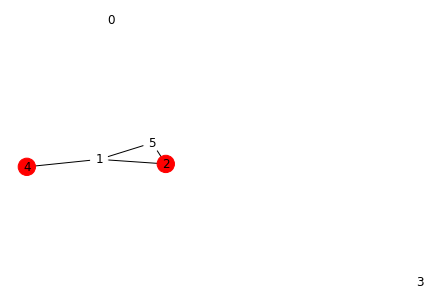

In [26]:
# Example:
G = randomly_colored_graph(6, pair_prob=0.3, color_prob=0.2)
draw_graph(G)
for i in G.nodes:
    print(i, G.nodes[i]['color'])

**Problem 4**

In this problem, we are interested in generating all communities with density greater than $\alpha$.

The density of a community is a quantity that captures how connected a community is.  There are different ways to quantify this value.

For this assignment, we define the density of a community with $k$ nodes and $e$ edges as ${2 * e \over k(k-1)}$.  This value is between 0 and 1.  When the density is 0, there are no edges in the community. When the density is 1, the community has the maximum number of edges.

Use backtracking to implement a function called *dense_communities* that generates all communities in a graph with density greater than a parameter $\alpha$.

In [80]:
def get_set(boolean_list):
    output = set()
    for i in range(len(boolean_list)):
        if boolean_list[i]==True:
            output.add(i)
    return output

def density(a_solution, G):
    nodes = list(get_set(a_solution))
    print(nodes)
    count = 0
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            u, v = nodes[i], nodes[j]
            if (u,v) in G.edges:
                count += 1
    if len(nodes) < 2:
        return 0
    else:
        return  2 * count / (len(nodes)*(len(nodes)-1))

def community_at_level(solution, i):
    if i==len(solution):
        # we have a complete solution.
        print(get_set(solution))
    else:
        # we're still constructing solution.
        for p in [True, False]:
            solution[i] = p
            community_at_level(solution, i+1)

solution = [None] * len(G.nodes)
# community_at_level(solution, 0)
        

In [104]:
def dense_communities(G,alpha):
    def get_set(boolean_list):
        output = set()
        for i in range(len(boolean_list)):
            if boolean_list[i]==True:
                output.add(i)
        return output

    def community_at_level(solution, i):
        if i==len(solution):
            # we have a complete solution.  
            # Make sure the density of this comminity is dense.
            if density(solution,G) > alpha:
                nodes = get_set(solution)
                print(nodes)
        else:
            # we're still constructing solution.
            for p in [True, False]:
                solution[i] = p
                community_at_level(solution, i+1)

    solution = [None] * len(G.nodes)    
    community_at_level(solution, 0)

In [106]:
dense_communities(G,0.3)

{0, 1, 2, 4, 5}
{0, 1, 2, 4}
{0, 1, 2, 5}
{0, 1, 2}
{0, 1, 4, 5}
{0, 1, 4}
{0, 1, 5}
{0, 2, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4}
{1, 2, 3, 5}
{1, 2, 3}
{1, 2, 4, 5}
{1, 2, 4}
{1, 2, 5}
{1, 2}
{1, 3, 4, 5}
{1, 3, 4}
{1, 3, 5}
{1, 4, 5}
{1, 4}
{1, 5}
{2, 3, 5}
{2, 4, 5}
{2, 5}


**Problem 5**

Use backtracking to implement a function called *dense_red_communities* that generates all communities with density greater than $\alpha$ and more than $r$ percent of red colors.

(This problem is simply an abstraction of applications, in which a "red" node can be any characteristic that we want to detect in the communities.)

In [110]:
def get_set(boolean_list):
    output = set()
    for i in range(len(boolean_list)):
        if boolean_list[i]==True:
            output.add(i)
    return output

def density(a_solution, G):
    nodes = list(get_set(a_solution))
    count = 0
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            u, v = nodes[i], nodes[j]
            if (u,v) in G.edges:
                count += 1
    if len(nodes) < 2:
        return 0
    else:
        return  2 * count / (len(nodes)*(len(nodes)-1))
def percent_red(a_solution,G):
    total_red = 0
    for i in G.nodes:
        if G.nodes[i]['color'] == 'red':
            total_red += 1
    list_nodes = list(get_set(a_solution))
    red_count = 0
    for i in list_nodes:
        if G.nodes[i]['color'] == 'red':
            red_count += 1
    if total_red == 0:
        return 0
    else:
        return red_count * 100/ total_red

def community_at_level(solution, i):
    if i==len(solution):
        # we have a complete solution.
        print(get_set(solution))
    else:
        # we're still constructing solution.
        for p in [True, False]:
            solution[i] = p
            community_at_level(solution, i+1)

solution = [None] * len(G.nodes)
# community_at_level(solution, 0)
        

In [111]:


def dense_red_communities(G, alpha, r):
    # your back_tracking procedure goes in here.
    def get_set(boolean_list):
        output = set()
        for i in range(len(boolean_list)):
            if boolean_list[i]==True:
                output.add(i)
        return output

    def community_at_level(solution, i):
        if i==len(solution):
            # we have a complete solution.  
            # Make sure the density of this comminity is dense.
            if density(solution,G) > alpha and percent_red(solution,G) > r:
                nodes = get_set(solution)
                print(nodes)
        else:
            # we're still constructing solution.
            for p in [True, False]:
                solution[i] = p
                community_at_level(solution, i+1)

    solution = [None] * len(G.nodes)    
    community_at_level(solution, 0)

In [112]:
dense_red_communities(G, 0.3,40)

{0, 1, 2, 4, 5}
{0, 1, 2, 4}
{0, 1, 2, 5}
{0, 1, 2}
{0, 1, 4, 5}
{0, 1, 4}
{0, 2, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4}
{1, 2, 3, 5}
{1, 2, 3}
{1, 2, 4, 5}
{1, 2, 4}
{1, 2, 5}
{1, 2}
{1, 3, 4, 5}
{1, 3, 4}
{1, 4, 5}
{1, 4}
{2, 3, 5}
{2, 4, 5}
{2, 5}
